<a href="https://colab.research.google.com/github/StillWork/common/blob/main/e_75_1_YOLOv8_run_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO 8을 이용한 객체 검출 예

- colab에서 실행하며 GPU를 사용

## YOLO8 설치
- 객체 검출을 수행하는 공개 모델

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.3/614.3 kB 5.5 MB/s eta 0:00:00


In [2]:
import ultralytics

# ultralytics.checks()

Ultralytics YOLOv8.0.172 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [5]:
# 샘플 이미지 다운로드
!curl -L -o animal1.jpg https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEifUMi8Kv_o3zyTFitQYTyLkCRYnkRCYdkXgcLwyMQuWb7Sxcy5t-4zjXcpwEIuyJUbxd-3-sSrTmbirwMq1nVvaMxXGpVNYEa14hEle1uBfQWxVkg9o7VVklIhiYU3McSfdmX8wWTutNQka0haQJ081rLrU1RZSrF2qTwPhgbCI__X7rhhdO58Miex/s1024/ny.webp

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  239k  100  239k    0     0   544k      0 --:--:-- --:--:-- --:--:--  544k


# 또는 PC에서 업로드

In [23]:
from glob import glob
files =  glob('/content/*.jpg')
files

['/content/many2.jpg', '/content/animal1.jpg']

# 테스트 이미지 보기

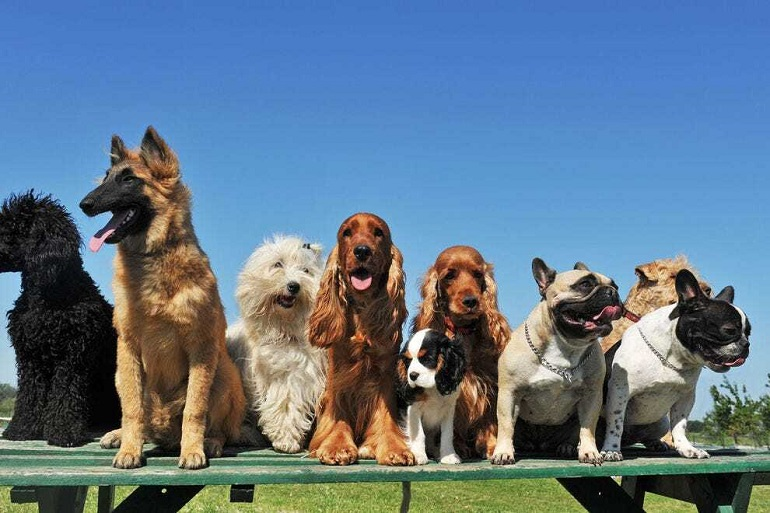

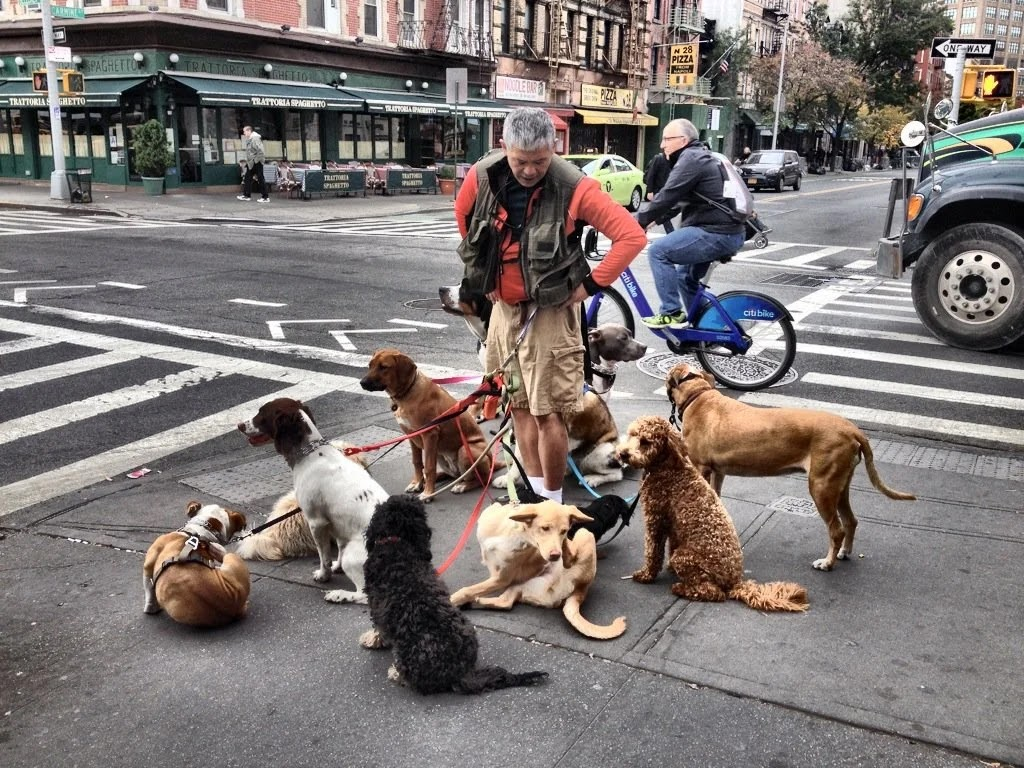

In [25]:
from PIL import Image
for file in files:
  with Image.open(file) as test_image:
    display(test_image)

# Detection (Python version)

In [10]:
# 모델 불러오기
from ultralytics import YOLO
model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 74.3MB/s]


# 모델 실행 (객체 검출)

In [26]:
results = model(source='/content/*.jpg', save=True)


image 1/2 /content/animal1.jpg: 480x640 4 persons, 1 bicycle, 3 cars, 1 truck, 8 dogs, 1 potted plant, 23.1ms
image 2/2 /content/many2.jpg: 448x640 7 dogs, 105.8ms
Speed: 8.5ms preprocess, 64.5ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


## 결과 보기 [매뉴얼](https://docs.ultralytics.com/reference/engine/results/)

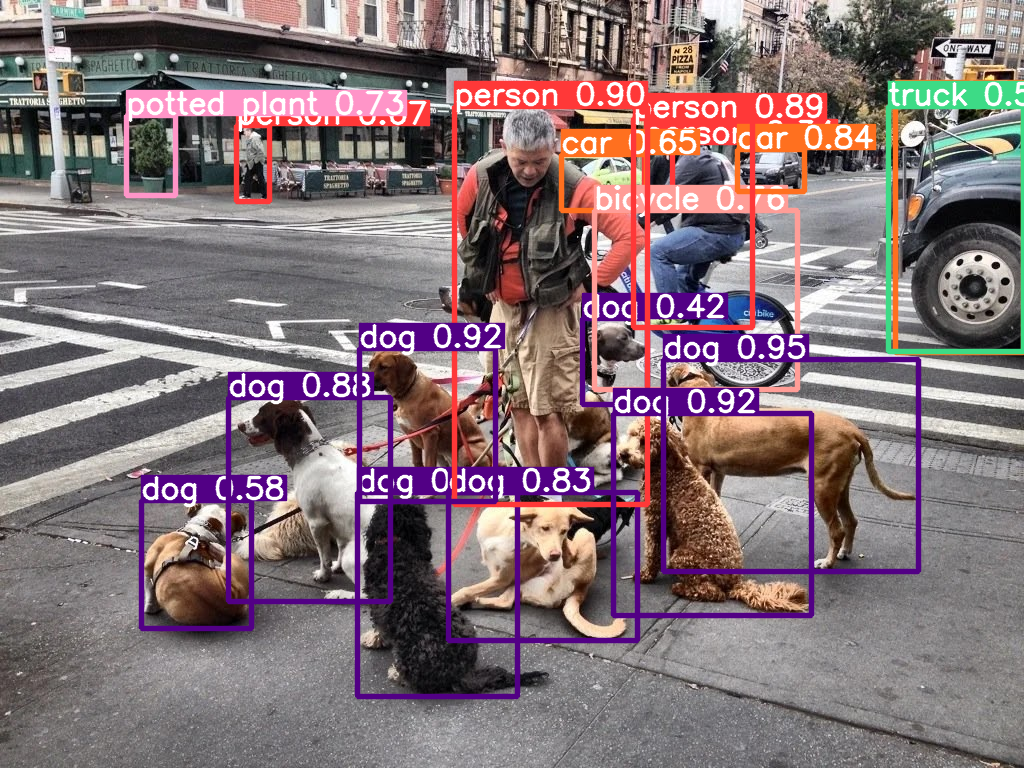

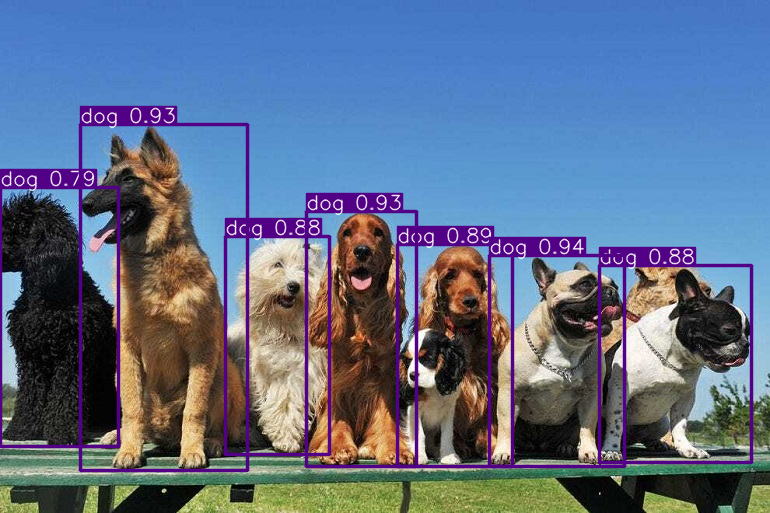

In [27]:
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    # im.show()  # show image
    display(im)
    # im.save('results.jpg')  # save image

In [29]:
import numpy as np

for result in results:

    uniq, cnt = np.unique(result.boxes.cls.cpu().numpy(), return_counts=True)  # Torch.Tensor -> numpy
    uniq_cnt_dict = dict(zip(uniq, cnt))

    print('\n{class num:counts} =', uniq_cnt_dict,'\n')

    for c in result.boxes.cls:
        print('class num =', int(c), ', class_name =', model.names[int(c)])


{class num:counts} = {0.0: 4, 1.0: 1, 2.0: 3, 7.0: 1, 16.0: 8, 58.0: 1} 

class num = 16 , class_name = dog
class num = 16 , class_name = dog
class num = 16 , class_name = dog
class num = 0 , class_name = person
class num = 0 , class_name = person
class num = 16 , class_name = dog
class num = 2 , class_name = car
class num = 16 , class_name = dog
class num = 16 , class_name = dog
class num = 1 , class_name = bicycle
class num = 58 , class_name = potted plant
class num = 0 , class_name = person
class num = 2 , class_name = car
class num = 16 , class_name = dog
class num = 7 , class_name = truck
class num = 16 , class_name = dog
class num = 0 , class_name = person
class num = 2 , class_name = car

{class num:counts} = {16.0: 7} 

class num = 16 , class_name = dog
class num = 16 , class_name = dog
class num = 16 , class_name = dog
class num = 16 , class_name = dog
class num = 16 , class_name = dog
class num = 16 , class_name = dog
class num = 16 , class_name = dog


In [30]:
results[0].boxes.xyxy

tensor([[ 663.4754,  359.6992,  918.6697,  571.5873],
        [ 613.5063,  413.0108,  811.8278,  615.4401],
        [ 359.3698,  348.4214,  495.3249,  501.1969],
        [ 454.9340,  106.6455,  647.4774,  504.3017],
        [ 633.7133,  118.2031,  752.3666,  327.9529],
        [ 228.9668,  397.8673,  390.0301,  601.6810],
        [ 737.4982,  149.2303,  804.0613,  191.7270],
        [ 448.4927,  492.2148,  637.6626,  640.2766],
        [ 357.8218,  492.0741,  517.3712,  696.3007],
        [ 594.7087,  210.8971,  797.7178,  389.5128],
        [ 126.8156,  115.9643,  175.1922,  195.3790],
        [ 236.1996,  125.0569,  269.8043,  201.5627],
        [ 561.7057,  154.5125,  646.6537,  210.6535],
        [ 141.6046,  500.1870,  251.0250,  628.3613],
        [ 888.4213,  106.1873, 1023.3920,  351.9193],
        [ 582.5198,  318.0376,  647.0294,  404.3034],
        [ 644.1132,  144.6636,  672.8488,  199.7234],
        [ 895.9826,  105.8519, 1023.3776,  352.0968]], device='cuda:0')